<a href="https://colab.research.google.com/github/Rishika140703/2022/blob/master/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

/tmp/ipython-input-2-2194379965.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661102,93.474382,89.895656,92.987279,28298800
2758,2022-12-16,90.323097,91.207837,89.478122,90.661084,48485500


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

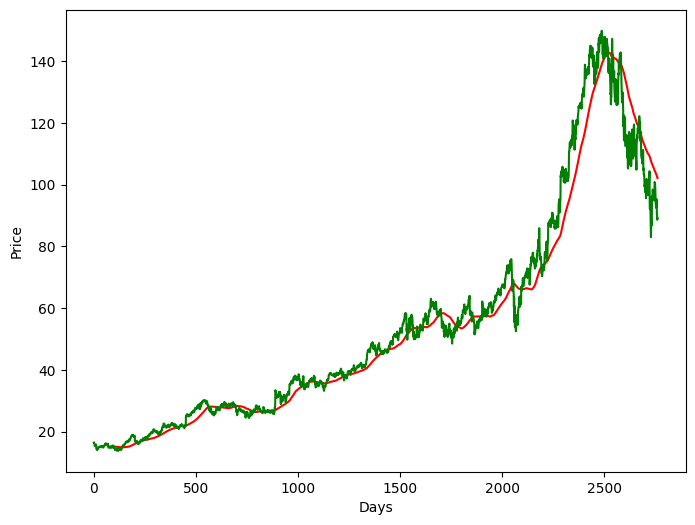

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

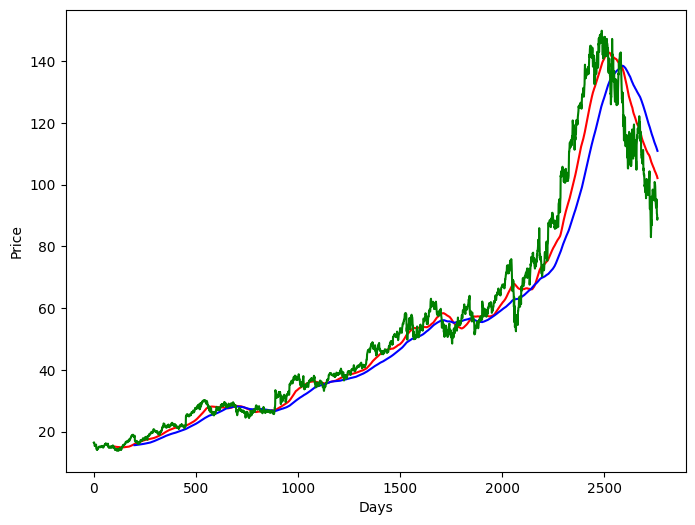

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2208

In [ ]:
data_test.shape[0]

553

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs=50, batch_size=32)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - loss: 0.0759
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - loss: 0.0065
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - loss: 0.0064
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - loss: 0.0058
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - loss: 0.0057
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step - loss: 0.0049
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - loss: 0.0042
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step - loss: 0.0044
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - loss: 0.0045
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


In [ ]:
scale =1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y, y_predict))
print("RMSE:", rmse)

RMSE: 5.0718279224605425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


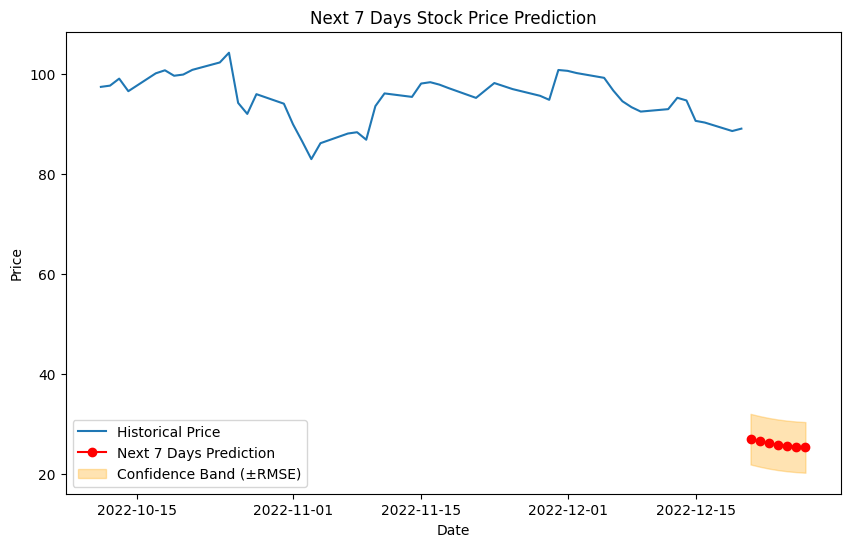

In [ ]:
# Multi-step forecasting for next 7 days
future_days = 7

# Get last 100 days of closing prices and scale
last_100_days = data.Close[-100:].values.reshape(-1, 1)
last_100_days_scaled = scaler.transform(last_100_days)

future_predictions = []
current_input = last_100_days_scaled.copy()

for _ in range(future_days):
    input_seq = np.array([current_input])
    pred_scaled = model.predict(input_seq, verbose=0)
    pred = pred_scaled[0][0] * (1 / scaler.scale_)
    future_predictions.append(pred)
    # Update input for next prediction
    current_input = np.append(current_input, [[pred_scaled[0][0]]], axis=0)[1:]

# Ensure predictions are 1D numpy arrays
future_predictions = np.array(future_predictions).flatten()

# Calculate RMSE if not already done
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_predict))

# Prepare future dates
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_days+1, inclusive='right')

# Plot
plt.figure(figsize=(10,6))
plt.plot(data['Date'][-50:], data.Close[-50:], label='Historical Price')
plt.plot(future_dates, future_predictions, 'ro-', label='Next 7 Days Prediction')

# Confidence band (±RMSE)
upper = future_predictions + rmse
lower = future_predictions - rmse
plt.fill_between(future_dates, lower, upper, color='orange', alpha=0.3, label='Confidence Band (±RMSE)')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Next 7 Days Stock Price Prediction')
plt.legend()
plt.show()

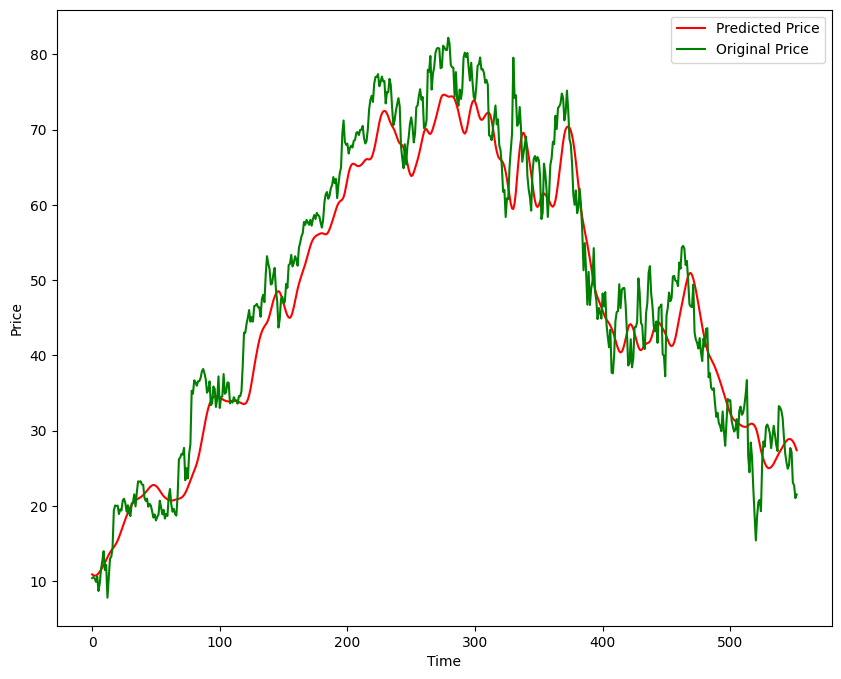

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Get the last 100 days of closing prices from your data
last_100_days = data.Close[-100:].values.reshape(-1, 1)

# Scale the data using the same scaler as training
last_100_days_scaled = scaler.transform(last_100_days)

# Prepare input for LSTM: shape (1, 100, 1)
X_input = np.array([last_100_days_scaled])

# Predict the next day's scaled price
next_day_scaled = model.predict(X_input)

# Inverse scale to get the actual price
next_day_price = next_day_scaled[0][0] * (1 / scaler.scale_)

print("Predicted next day's price:", next_day_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted next day's price: [26.90326825]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.save('Stock Predictions Model.keras')